# Show up dataset of SURREAL

---
展示SURREAL数据集（每份数据包括以下4中mat文件以及一个map4视频）

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_dir = './SURREAL/data/cmu/test/run0/03_03/03_03_c0001{}'
video_path = base_dir.format('.mp4')
depth_path = base_dir.format('_depth.mat')
gtflow_path = base_dir.format('_gtflow.mat')
info_path = base_dir.format('_info.mat')
segm_path = base_dir.format('_segm.mat')

In [4]:
depth_data = sio.loadmat(depth_path)
gtflow_data = sio.loadmat(gtflow_path)
info_data = sio.loadmat(info_path)
segm_data = sio.loadmat(segm_path)

In [5]:
print("depth key")
print(depth_data.keys())
print("gtflow key")
print(gtflow_data.keys())
print("info key")
print(info_data.keys())

depth key
['depth_28', 'depth_29', 'depth_24', 'depth_25', 'depth_26', 'depth_27', 'depth_20', 'depth_21', 'depth_22', 'depth_23', 'depth_100', 'depth_9', 'depth_8', 'depth_1', 'depth_3', 'depth_2', 'depth_5', 'depth_4', 'depth_7', 'depth_6', 'depth_39', 'depth_38', 'depth_37', 'depth_36', 'depth_35', 'depth_34', 'depth_33', 'depth_32', 'depth_31', 'depth_30', 'depth_88', 'depth_89', 'depth_82', 'depth_83', 'depth_80', 'depth_81', 'depth_86', 'depth_87', 'depth_84', 'depth_85', 'depth_15', 'depth_14', 'depth_17', 'depth_16', 'depth_11', 'depth_10', 'depth_13', 'depth_12', 'depth_19', 'depth_18', 'depth_99', 'depth_98', 'depth_95', 'depth_94', 'depth_97', 'depth_96', 'depth_91', 'depth_90', 'depth_93', 'depth_92', 'depth_60', 'depth_61', 'depth_62', 'depth_63', 'depth_64', 'depth_65', 'depth_66', 'depth_67', 'depth_68', 'depth_69', '__header__', 'depth_73', 'depth_72', 'depth_71', 'depth_70', 'depth_77', 'depth_76', 'depth_75', 'depth_74', 'depth_79', 'depth_78', '__globals__', 'depth_4

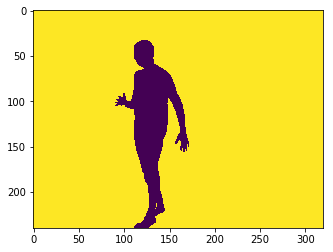

In [6]:
plt.imshow(depth_data['depth_53'])
plt.show()

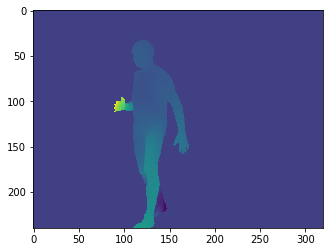

In [7]:
plt.imshow(gtflow_data['gtflow_54'][:,:,1])
plt.show()

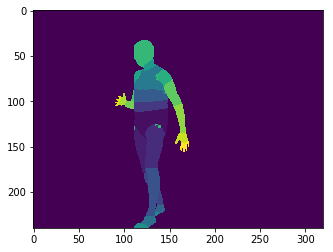

In [8]:
plt.imshow(segm_data['segm_53'])
plt.show()

In [9]:
for key in info_data.keys():
    if hasattr(info_data[key],'shape'):
        print(key,info_data[key].shape)
    else:
        print(key,info_data[key])

('zrot', (100, 1))
('camDist', (1, 1))
('bg', (1, 100))
('joints3D', (3, 24, 100))
('pose', (72, 100))
('clipNo', (1, 1))
('joints2D', (2, 24, 100))
('gender', (100, 1))
('sequence', (1,))
('__header__', 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Mar  6 20:47:40 2017')
('__globals__', [])
('source', (1,))
('shape', (10, 100))
('stride', (1, 1))
('light', (9, 100))
('__version__', '1.0')
('cloth', (1, 100))
('camLoc', (3, 1))


In [10]:
info_data['camDist']

array([[7.93635]], dtype=float32)

In [11]:
info_data['camLoc']

array([[ 6.309274 ],
       [-1.1588247],
       [ 1.4636648]], dtype=float32)

In [12]:
from smpl_np import SMPLModel

In [71]:
smpl = SMPLModel('./base_model.pkl')
np.random.seed(9608)
index = 50
beta = info_data['shape'][:,index]
pose = info_data['pose'][:,index]
trans = np.zeros(smpl.trans_shape)
smpl.set_params(beta=beta, pose=pose, trans=trans)
Z,X,Y = [smpl.verts[:,0], smpl.verts[:,1],smpl.verts[:,2]]
zrot = info_data['zrot'][index,][0]

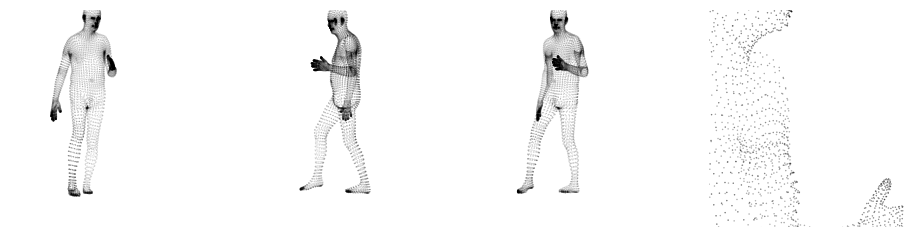

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
def smpl_view_set_axis_full_body(ax,azimuth=0):
    ## Manually set axis 
    ax.view_init(0, azimuth)
    max_range = 0.55
    ax.set_xlim( - max_range,   max_range)
    ax.set_ylim( - max_range,   max_range)
    ax.set_zlim( -0.2 - max_range,   -0.2 + max_range)
    ax.axis('off')
    
def smpl_view_set_axis_face(ax, azimuth=0):
    ## Manually set axis 
    ax.view_init(0, azimuth)
    max_range = 0.1
    ax.set_xlim( - max_range,   max_range)
    ax.set_ylim( - max_range,   max_range)
    ax.set_zlim( 0.45 - max_range,   0.45 + max_range)
    ax.axis('off')

## Now let's rotate around the model and zoom into the face.

fig = plt.figure(figsize=[16,4])

ax = fig.add_subplot(141, projection='3d')
ax.scatter(Z,X,Y,s=0.02,c='k')
smpl_view_set_axis_full_body(ax)

ax = fig.add_subplot(142, projection='3d')
ax.scatter(Z,X,Y,s=0.02,c='k')
smpl_view_set_axis_full_body(ax,zrot*360)

ax = fig.add_subplot(143, projection='3d')
ax.scatter(Z,X,Y,s=0.02,c='k')
smpl_view_set_axis_full_body(ax,zrot*180)

ax = fig.add_subplot(144, projection='3d')
ax.scatter(Z,X,Y,s=0.2,c='k')
smpl_view_set_axis_face(ax,-40)

plt.show()

# video cut

---
对视频进行分帧

In [9]:
import os
import scipy.io as sio
import json
root_path = "./SURREAL/data/cmu/"
outputs = os.walk(root_path)

In [ ]:
output_im_dir = './SURREAL/summary/image/'
video_count = 0
info_count = 0
json_infos = {}
for output in outputs:
    pre_dir = output[0].split('/')[-2]
    if len(output[1]) != 0:
        continue
    for f_name in output[2]:
        try:
            if '.mp4' in f_name:
                video_path = os.path.join(output[0],f_name)
                frame_path = os.path.join(output_im_dir,"{}_{}_frame%4d.jpg".format(pre_dir,f_name[:-4]))
                video_count += 1
                os.system('ffmpeg -i {} {}'.format(video_path,frame_path))
            if '_info.mat' in f_name:
                info_count += 1
                info_path = os.path.join(output[0],f_name)
                data = sio.loadmat(info_path)
                for index in range(data['pose'].shape[1]):
                    cur_f_name = '{}_{}_frame{:0>4}.jpg'.format(pre_dir,f_name[:-4],index+1)
                    json_infos[cur_f_name] = {}
                    json_infos[cur_f_name]['shape'] = data['shape'][:,index].tolist()
                    json_infos[cur_f_name]['pose'] = data['pose'][:,index].tolist()
                    json_infos[cur_f_name]['joints3D'] = data['joints3D'][:,:,index].tolist()
                    json_infos[cur_f_name]['joints2D'] = data['joints2D'][:,:,index].tolist()
        except Exception:
            print(info_path)
f = open('./SURREAL/summary/summary.json','w')
f.write(json.dumps(json_infos,indent=2))

./SURREAL/data/cmu/train/run2/ung_90_10/ung_90_10_c0001_info.mat
./SURREAL/data/cmu/train/run0/ung_90_10/ung_90_10_c0001_info.mat
./SURREAL/data/cmu/train/run1/ung_90_10/ung_90_10_c0001_info.mat


# SURREAL statistics

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import scipy.io as sio

In [13]:
def statistics(x, name = "no name"):
    print(name,"mean",np.mean(x),"std",np.std(x),"max",np.max(x),"min",np.min(x))
    print(name,"ptp",np.ptp(x),"median",np.median(x),"average",np.average(x),"var",np.var(x))
    print()

In [4]:
root_path = './SURREAL/data/cmu/'
outputs = os.walk(root_path)
frame_not_100 = []
file_number = 0
for output in outputs:
    if len(output[1]) != 0:
        continue
    for f_name in output[2]:
        if '_info.mat' in f_name:
            info_path = os.path.join(output[0],f_name)
            data = sio.loadmat(info_path)
            file_number += 1
            if data['shape'].shape != (10,100):
                frame_not_100.append(os.path.join(output[0],f_name))
            print(file_number,end='\r')
print(file_number,len(frame_not_100))
# 结果表示并非所有的MP4都是100帧，需要再次验证每个视频的标注数是否与分帧数一致

68036 8067


In [16]:
root_path = './SURREAL/data/cmu/'
outputs = os.walk(root_path)
number = 0
num = []
btmp = [[] for i in range(10)]
for output in outputs:
    if len(output[1]) != 0:
        continue
    for f_name in output[2]:
        if '_info.mat' in f_name:
            info_path = os.path.join(output[0],f_name)
            data = sio.loadmat(info_path)
            for i in range(data['shape'].shape[1]):
                number += 1
                for j in range(10):
                    btmp[j].append(data['shape'][j,i])
                num.extend([number])
                print(number,end='\r')

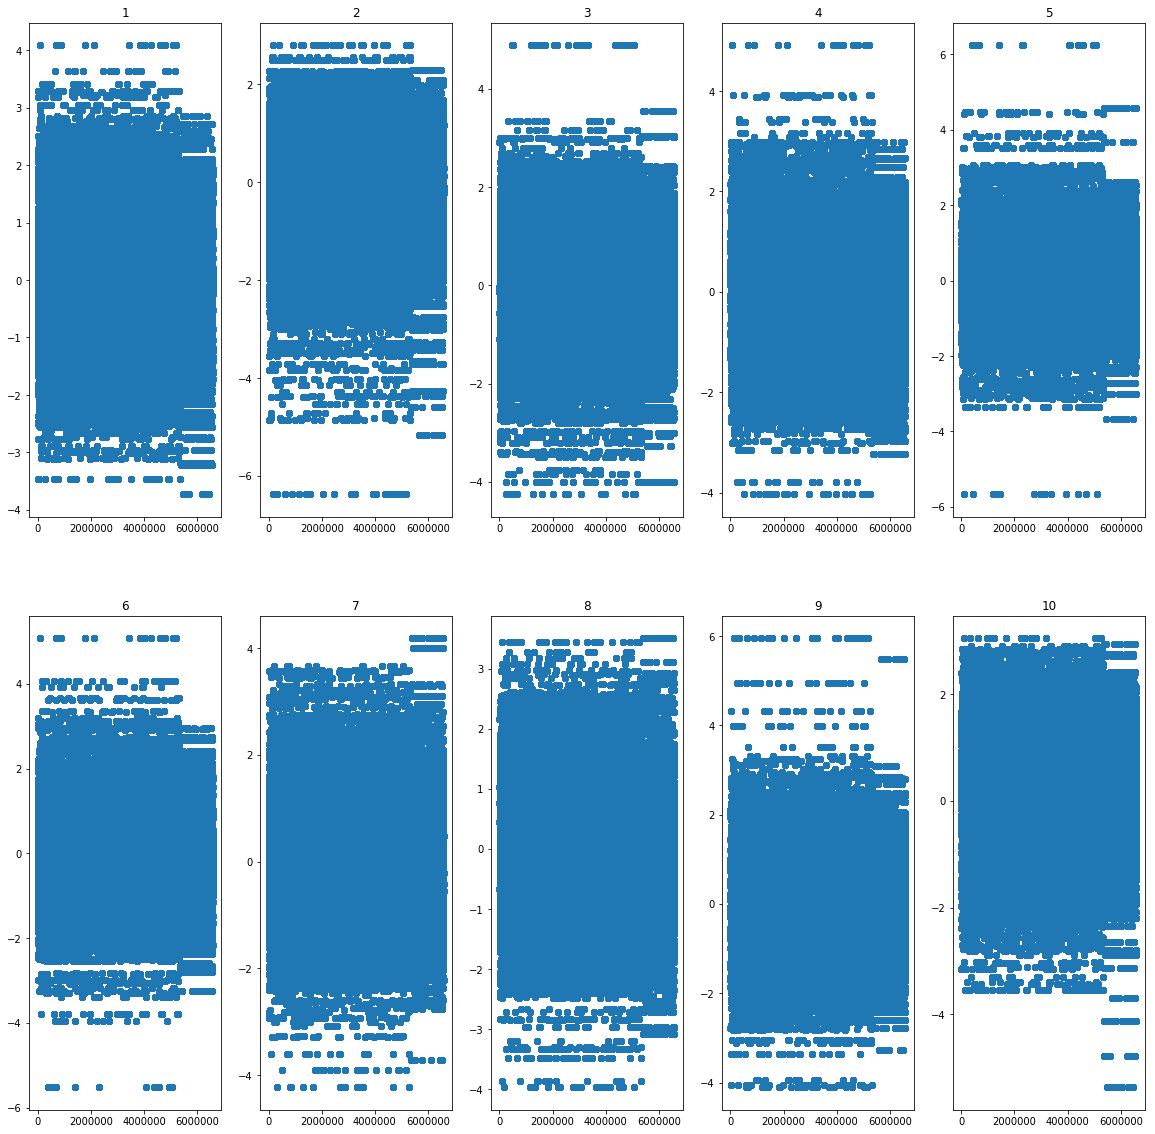

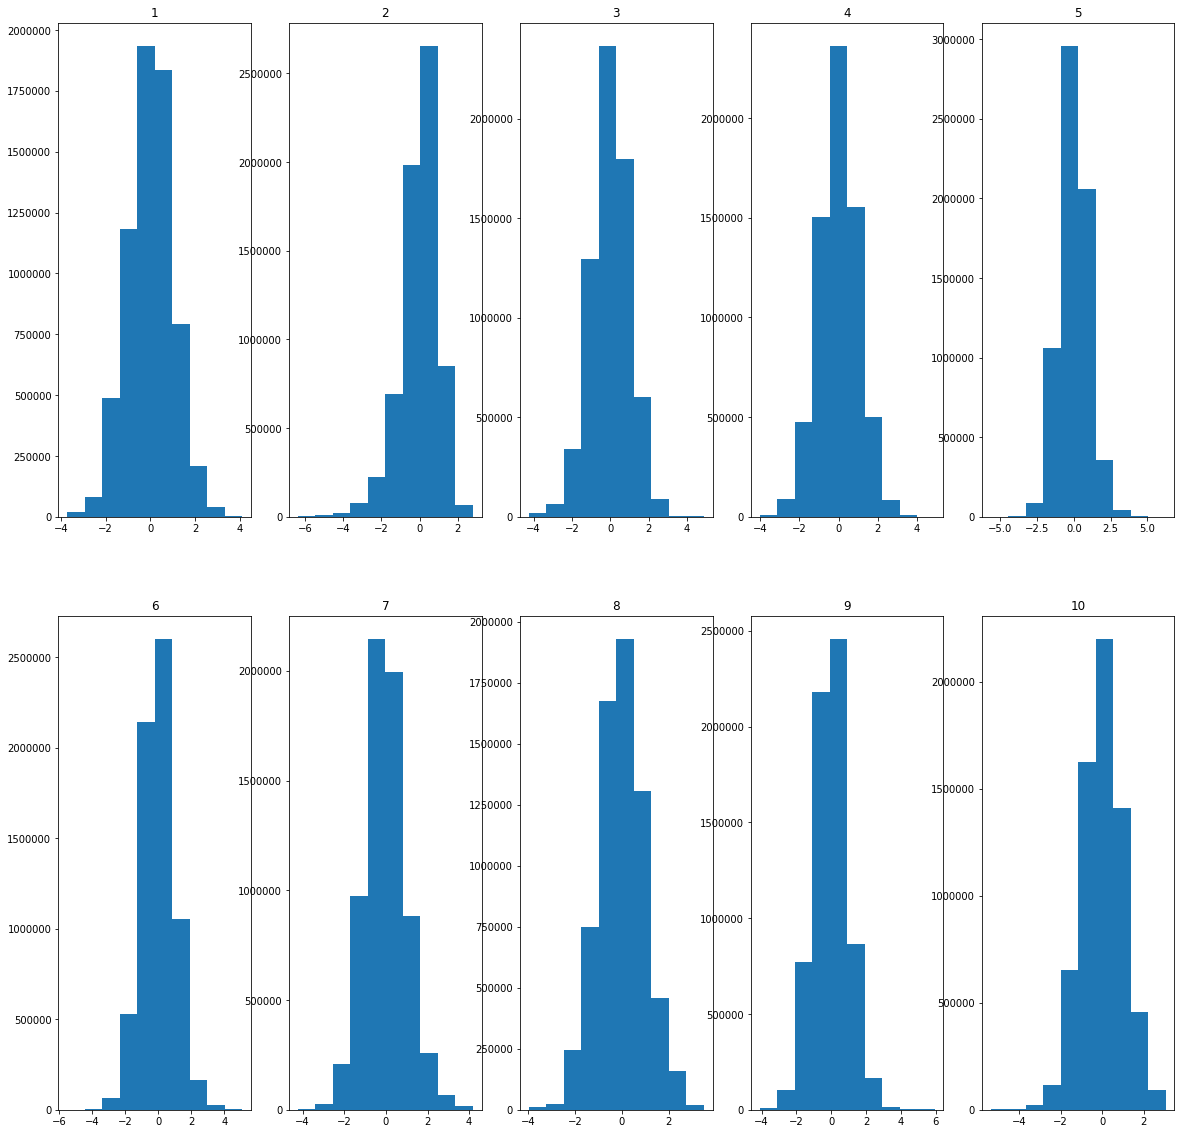

In [17]:
plt.figure(1,figsize=(20,20))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(i+1)
    plt.scatter(num,btmp[i])
plt.show()
plt.figure(2,figsize=(20,20))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(i+1)
    plt.hist(btmp[i])
plt.show()

In [18]:
for i in range(10):
    statistics(btmp[i],str(i))

0 mean -0.0022708194 std 1.0016727 max 4.0846353 min -3.723884
0 ptp 7.8085194 median 0.021887563 average -0.0022708194 var 1.0033484

1 mean 0.008908267 std 0.9981248 max 2.7927456 min -6.370642
1 ptp 9.163387 median 0.14111471 average 0.008908267 var 0.9962531

2 mean 0.0034290815 std 1.0045449 max 4.8829327 min -4.246937
2 ptp 9.129869 median 0.02360162 average 0.0034290815 var 1.0091103

3 mean 0.0033523552 std 1.0017619 max 4.9109817 min -4.0294943
3 ptp 8.940475 median -0.00031414433 average 0.0033523552 var 1.003527

4 mean 0.0004869495 std 0.996628 max 6.242621 min -5.6628275
4 ptp 11.905449 median -0.02137072 average 0.0004869495 var 0.9932673

5 mean -0.0033821142 std 1.0021927 max 5.07424 min -5.517637
5 ptp 10.591877 median -0.008156484 average -0.0033821142 var 1.0043902

6 mean -0.0032159786 std 0.99668366 max 4.178355 min -4.2233424
6 ptp 8.401697 median -0.048408274 average -0.0032159786 var 0.9933783

7 mean -0.00064348534 std 0.99730754 max 3.500774 min -3.9633548
7 p

# im label match

In [4]:
import os
image_dir = './SURREAL/summary/image/'
label_dir = './SURREAL/summary/labels/'

In [6]:
im_names = os.listdir(image_dir)
                    
for name in im_names[:10]:
    base_name = name[:-4]
    label_path = os.path.join(label_dir,base_name+".json")
    if os.path.exists(label_path):
        print(base_name)


run1_36_19_c0012_frame0042
run0_ung_60_06_c0008_frame0054
run1_91_18_c0021_frame0007
run2_ung_143_34_c0001_frame0043
run0_13_17_c0015_frame0029
run1_ung_56_02_c0026_frame0007
run0_ung_125_06_c0001_frame0024
run0_143_22_c0004_frame0032
run0_ung_85_03_c0014_frame0002
run1_ung_137_15_c0035_frame0044


In [3]:
label_names = os.listdir(label_dir)

for name in label_names[:10]:
    print(name)

run1_ung_77_02_c0003_frame0069.json
run1_ung_137_17_c0004_frame0017.json
run1_54_06_c0061_frame0020.json
run1_111_22_c0034_frame0079.json
run1_06_12_c0002_frame0050.json
run1_ung_104_23_c0011_frame0038.json
run1_26_02_c0016_frame0045.json
run2_75_11_c0001_frame0024.json
run0_137_33_c0006_frame0048.json
run1_ung_132_39_c0021_frame0002.json


# filter image

In [1]:
import scipy.io as sio
import os
import logging
import numpy as np
logging.basicConfig(level=logging.DEBUG,  
                    format='%(asctime)s [line:%(lineno)d] %(levelname)s %(message)s',  
                    datefmt='%a, %d %b %Y %H:%M:%S')  

In [2]:
root_path = './SURREAL/data/cmu/'
outputs = os.walk(root_path)

In [3]:
no_people_im = 0
for output in outputs:
    pre_dir = output[0].split('/')[-2]
    if len(output[1]) != 0:
        continue
    for f_name in output[2]:
        if '_segm.mat' in f_name:
            file_path = os.path.join(output[0],f_name)
            data = sio.loadmat(file_path)
            for key in data.keys():
                if 'segm' not in key:
                    continue
                im = data[key]
                scale = np.sum(im) / (im.shape[0] * im.shape[1])
                if scale < 0.1 :
                    logging.info("=============>{},{}".format(output[0],f_name))
                    no_people_im += 1
                    break

Tue, 18 Dec 2018 11:08:34 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/ung_78_22,ung_78_22_c0002_segm.mat
Tue, 18 Dec 2018 11:08:35 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/106_32,106_32_c0003_segm.mat
Tue, 18 Dec 2018 11:08:35 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/106_32,106_32_c0002_segm.mat
Tue, 18 Dec 2018 11:08:35 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/35_26,35_26_c0001_segm.mat
Tue, 18 Dec 2018 11:08:36 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/ung_77_31,ung_77_31_c0005_segm.mat
Tue, 18 Dec 2018 11:08:36 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/ung_134_01,ung_134_01_c0001_segm.mat
Tue, 18 Dec 2018 11:08:37 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/105_62,105_62_c0006_segm.mat
Tue, 18 Dec 2018 11:08:37 [line:16] INFO =============>./SURREAL/data/cmu/train/run2/ung_136_08,ung_136_08_c0003_segm.mat


KeyboardInterrupt: 

In [ ]:
no_people_im